# PyCity Schools Analysis

- Your analysis here
  Average Math and Reading Scores reflect the overall academic performance in these subjects across different categories. Percent Passing Math and Reading indicate the proportion of students achieving a passing score, highlighting effectiveness in meeting educational standards. Overall Passing Rate combines math and reading passing rates to give a comprehensive view of overall student success.

Smaller schools, defined as having fewer than 1000 students, tend to have higher average scores and passing rates compared to larger schools.

Private schools generally outperform public schools in both academic scores and passing rates.

---

In [3]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load (Remember to Change These)
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])
school_data_complete.head()


,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635


## District Summary

In [4]:
# Calculate the total number of unique schools
school_count = school_data_complete["school_name"].nunique()
school_count


15

In [5]:
# Calculate the total number of students
student_count = school_data_complete["Student ID"].count()
student_count


39170

In [6]:
# Calculate the total budget
total_budget = school_data_complete["budget"].sum()
total_budget


82932329558

In [7]:
# Calculate the average (mean) math score
average_math_score = school_data_complete["math_score"].mean()
average_math_score


78.98537145774827

In [8]:
# Calculate the average (mean) reading score
average_reading_score = school_data_complete["reading_score"].mean()
average_reading_score


81.87784018381414

In [9]:
# Use the following to calculate the percentage of students who passed math (math scores greather than or equal to 70)
passing_math_count = school_data_complete[(school_data_complete["math_score"] >= 70)].count()["student_name"]
passing_math_percentage = passing_math_count / float(student_count) * 100
passing_math_percentage


74.9808526933878

In [10]:
# Calculate the percentage of students who passed reading (hint: look at how the math percentage was calculated)
passing_reading_count = school_data_complete[(school_data_complete["reading_score"] >= 70)].count()["student_name"]
passing_reading_percentage = passing_reading_count / float(student_count) * 100
passing_reading_percentage


85.80546336482001

In [11]:
# Use the following to calculate the percentage of students that passed math and reading
passing_math_reading_count = school_data_complete[
    (school_data_complete["math_score"] >= 70) & (school_data_complete["reading_score"] >= 70)
].count()["student_name"]
overall_passing_rate = passing_math_reading_count /  float(student_count) * 100
overall_passing_rate


65.17232575950983

In [12]:
# Create a high-level snapshot of the district's key metrics in a DataFrame
district_summary = pd.DataFrame(
    {
        "Total Schools": [school_count], 
        "Total Students": [student_count], 
        "Total Budget": [total_budget],
        "Average Math Score": [average_math_score], 
        "Average Reading Score": [average_reading_score],
        "% Passing Math": [passing_math_percentage],
        "% Passing Reading": [passing_reading_percentage],
        "% Overall Passing": [overall_passing_rate]
    }
)

# Formatting
district_summary["Total Students"] = district_summary["Total Students"].map("{:,}".format)
district_summary["Total Budget"] = district_summary["Total Budget"].map("${:,.2f}".format)
# Display the DataFrame
district_summary 


,Total Schools,Total Students,Total Budget,Average Math Score,Average Reading Score,% Passing Math,% Passing Reading,% Overall Passing
0,15,"39,170","$82,932,329,558.00",78.985371,81.87784,74.980853,85.805463,65.172326


## School Summary

In [13]:
# Use the code provided to select the type per school from school_data
school_types = school_data.set_index(["school_name"])["type"]
school_data

,School ID,school_name,type,size,budget
0,0,Huang High School,District,2917,1910635
1,1,Figueroa High School,District,2949,1884411
2,2,Shelton High School,Charter,1761,1056600
3,3,Hernandez High School,District,4635,3022020
4,4,Griffin High School,Charter,1468,917500
5,5,Wilson High School,Charter,2283,1319574
6,6,Cabrera High School,Charter,1858,1081356
7,7,Bailey High School,District,4976,3124928
8,8,Holden High School,Charter,427,248087
9,9,Pena High School,Charter,962,585858


In [14]:
school_types


school_name
Huang High School        District
Figueroa High School     District
Shelton High School       Charter
Hernandez High School    District
Griffin High School       Charter
Wilson High School        Charter
Cabrera High School       Charter
Bailey High School       District
Holden High School        Charter
Pena High School          Charter
Wright High School        Charter
Rodriguez High School    District
Johnson High School      District
Ford High School         District
Thomas High School        Charter
Name: type, dtype: object

In [15]:
# Calculate the total student count per school from school_data
per_school_counts = school_data.groupby('school_name')['size'].sum()
per_school_counts

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: size, dtype: int64

In [16]:
# Calculate the total school budget and per capita spending per school from school_data
per_school_budget = school_data.groupby('school_name')['budget'].sum()
per_school_capita = per_school_budget/per_school_counts
per_school_capita

school_name
Bailey High School       628.0
Cabrera High School      582.0
Figueroa High School     639.0
Ford High School         644.0
Griffin High School      625.0
Hernandez High School    652.0
Holden High School       581.0
Huang High School        655.0
Johnson High School      650.0
Pena High School         609.0
Rodriguez High School    637.0
Shelton High School      600.0
Thomas High School       638.0
Wilson High School       578.0
Wright High School       583.0
dtype: float64

In [17]:
school_data_complete

,Student ID,student_name,gender,grade,school_name,reading_score,math_score,School ID,type,size,budget
0,0,Paul Bradley,M,9th,Huang High School,66,79,0,District,2917,1910635
1,1,Victor Smith,M,12th,Huang High School,94,61,0,District,2917,1910635
2,2,Kevin Rodriguez,M,12th,Huang High School,90,60,0,District,2917,1910635
3,3,Dr. Richard Scott,M,12th,Huang High School,67,58,0,District,2917,1910635
4,4,Bonnie Ray,F,9th,Huang High School,97,84,0,District,2917,1910635
...,...,...,...,...,...,...,...,...,...,...,...
39165,39165,Donna Howard,F,12th,Thomas High School,99,90,14,Charter,1635,1043130
39166,39166,Dawn Bell,F,10th,Thomas High School,95,70,14,Charter,1635,1043130
39167,39167,Rebecca Tanner,F,9th,Thomas High School,73,84,14,Charter,1635,1043130
39168,39168,Desiree Kidd,F,10th,Thomas High School,99,90,14,Charter,1635,1043130


In [18]:
# Calculate the average test scores per school from school_data_complete
per_school_math = school_data_complete.groupby('school_name')['math_score'].mean()
per_school_reading = school_data_complete.groupby('school_name')['reading_score'].mean()
print(per_school_math)
print(per_school_reading)

school_name
Bailey High School       77.048432
Cabrera High School      83.061895
Figueroa High School     76.711767
Ford High School         77.102592
Griffin High School      83.351499
Hernandez High School    77.289752
Holden High School       83.803279
Huang High School        76.629414
Johnson High School      77.072464
Pena High School         83.839917
Rodriguez High School    76.842711
Shelton High School      83.359455
Thomas High School       83.418349
Wilson High School       83.274201
Wright High School       83.682222
Name: math_score, dtype: float64
school_name
Bailey High School       81.033963
Cabrera High School      83.975780
Figueroa High School     81.158020
Ford High School         80.746258
Griffin High School      83.816757
Hernandez High School    80.934412
Holden High School       83.814988
Huang High School        81.182722
Johnson High School      80.966394
Pena High School         84.044699
Rodriguez High School    80.744686
Shelton High School      83.72572

In [20]:
# Calculate the number of students per school with math scores of 70 or higher from school_data_complete
students_passing_math = school_data_complete[school_data_complete["math_score"] >= 70]
school_students_passing_math = students_passing_math.groupby('school_name').count()['student_name']
school_students_passing_math

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
Name: student_name, dtype: int64

In [21]:
students_passing_math = school_data_complete[(school_data_complete["math_score"] >= 70)]
students_passing_math
school_students_passing_math = students_passing_math.groupby('school_name').size()
print(school_students_passing_math)

school_name
Bailey High School       3318
Cabrera High School      1749
Figueroa High School     1946
Ford High School         1871
Griffin High School      1371
Hernandez High School    3094
Holden High School        395
Huang High School        1916
Johnson High School      3145
Pena High School          910
Rodriguez High School    2654
Shelton High School      1653
Thomas High School       1525
Wilson High School       2143
Wright High School       1680
dtype: int64


In [23]:
# Calculate the number of students per school with reading scores of 70 or higher from school_data_complete
students_passing_reading = school_data_complete[school_data_complete["reading_score"] >= 70]
school_students_passing_reading = students_passing_reading.groupby('school_name').count()['student_name']
school_students_passing_reading

school_name
Bailey High School       4077
Cabrera High School      1803
Figueroa High School     2381
Ford High School         2172
Griffin High School      1426
Hernandez High School    3748
Holden High School        411
Huang High School        2372
Johnson High School      3867
Pena High School          923
Rodriguez High School    3208
Shelton High School      1688
Thomas High School       1591
Wilson High School       2204
Wright High School       1739
Name: student_name, dtype: int64

In [25]:
# Use the provided code to calculate the number of students per school that passed both math and reading with scores of 70 or higher
students_passing_math_and_reading = school_data_complete[
    (school_data_complete["reading_score"] >= 70) & (school_data_complete["math_score"] >= 70)
]
school_students_passing_math_and_reading = students_passing_math_and_reading.groupby(["school_name"]).size()
school_students_passing_math_and_reading

school_name
Bailey High School       2719
Cabrera High School      1697
Figueroa High School     1569
Ford High School         1487
Griffin High School      1330
Hernandez High School    2481
Holden High School        381
Huang High School        1561
Johnson High School      2549
Pena High School          871
Rodriguez High School    2119
Shelton High School      1583
Thomas High School       1487
Wilson High School       2068
Wright High School       1626
dtype: int64

In [30]:
# Use the provided code to calculate the passing rates
per_school_passing_math = school_students_passing_math / per_school_counts * 100
per_school_passing_reading = school_students_passing_reading / per_school_counts * 100
overall_passing_rate = school_students_passing_math_and_reading / per_school_counts * 100
overall_passing_rate

school_name
Bailey High School       54.642283
Cabrera High School      91.334769
Figueroa High School     53.204476
Ford High School         54.289887
Griffin High School      90.599455
Hernandez High School    53.527508
Holden High School       89.227166
Huang High School        53.513884
Johnson High School      53.539172
Pena High School         90.540541
Rodriguez High School    52.988247
Shelton High School      89.892107
Thomas High School       90.948012
Wilson High School       90.582567
Wright High School       90.333333
dtype: float64

In [34]:
# Create a DataFrame called `per_school_summary` with columns for the calculations above.
per_school_budget = school_data.set_index(["school_name"])["budget"]
per_school_types = school_data.set_index(["school_name"])["type"]

per_student_budget = per_school_budget / per_school_counts

per_school_summary = pd.DataFrame({
    "School Type": per_school_types,
    "Total Students": per_school_counts,
    "Total School Budget": per_school_budget,
    "Per Student Budget": per_student_budget,
    "Average Math Score": per_school_math / per_school_counts,
    "Average Reading Score": per_school_reading / per_school_counts,
    "Percent Passing Math": per_school_passing_math,
    "Percent Passing Reading": per_school_passing_reading,
    "Overall Passing Rate": overall_passing_rate
})

# Formatting
per_school_summary["Total School Budget"] = per_school_summary["Total School Budget"].map("${:,.2f}".format)
per_school_summary["Per Student Budget"] = per_school_summary["Per Student Budget"].map("${:,.2f}".format)

# Display the DataFrame
per_school_summary


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",$628.00,0.015484,0.016285,66.680064,81.933280,54.642283
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,0.044705,0.045197,94.133477,97.039828,91.334769
Figueroa High School,District,2949,"$1,884,411.00",$639.00,0.026013,0.027521,65.988471,80.739234,53.204476
Ford High School,District,2739,"$1,763,916.00",$644.00,0.028150,0.029480,68.309602,79.299014,54.289887
Griffin High School,Charter,1468,"$917,500.00",$625.00,0.056779,0.057096,93.392371,97.138965,90.599455
Hernandez High School,District,4635,"$3,022,020.00",$652.00,0.016675,0.017462,66.752967,80.862999,53.527508
Holden High School,Charter,427,"$248,087.00",$581.00,0.196261,0.196288,92.505855,96.252927,89.227166
Huang High School,District,2917,"$1,910,635.00",$655.00,0.026270,0.027831,65.683922,81.316421,53.513884
Johnson High School,District,4761,"$3,094,650.00",$650.00,0.016188,0.017006,66.057551,81.222432,53.539172


## Highest-Performing Schools (by % Overall Passing)

In [35]:
# Sort the schools by `% Overall Passing` in descending order and display the top 5 rows.
top_schools = per_school_summary.sort_values(by="Overall Passing Rate", ascending=False)

top_schools.head(5)


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Cabrera High School,Charter,1858,"$1,081,356.00",$582.00,0.044705,0.045197,94.133477,97.039828,91.334769
Thomas High School,Charter,1635,"$1,043,130.00",$638.00,0.051020,0.051284,93.272171,97.308869,90.948012
Griffin High School,Charter,1468,"$917,500.00",$625.00,0.056779,0.057096,93.392371,97.138965,90.599455
Wilson High School,Charter,2283,"$1,319,574.00",$578.00,0.036476,0.036789,93.867718,96.539641,90.582567
Pena High School,Charter,962,"$585,858.00",$609.00,0.087152,0.087365,94.594595,95.945946,90.540541


## Bottom Performing Schools (By % Overall Passing)

In [36]:
# Sort the schools by `% Overall Passing` in ascending order and display the top 5 rows.
bottom_schools = per_school_summary.sort_values(by="Overall Passing Rate", ascending=True)
bottom_schools.head(5)


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Passing Rate
school_name,,,,,,,,,
Rodriguez High School,District,3999,"$2,547,363.00",$637.00,0.019215,0.020191,66.366592,80.220055,52.988247
Figueroa High School,District,2949,"$1,884,411.00",$639.00,0.026013,0.027521,65.988471,80.739234,53.204476
Huang High School,District,2917,"$1,910,635.00",$655.00,0.026270,0.027831,65.683922,81.316421,53.513884
Hernandez High School,District,4635,"$3,022,020.00",$652.00,0.016675,0.017462,66.752967,80.862999,53.527508
Johnson High School,District,4761,"$3,094,650.00",$650.00,0.016188,0.017006,66.057551,81.222432,53.539172


## Math Scores by Grade

In [47]:
# Separate the data by grade
ninth_graders = school_data_complete[school_data_complete["grade"] == "9th"]
tenth_graders = school_data_complete[school_data_complete["grade"] == "10th"]
eleventh_graders = school_data_complete[school_data_complete["grade"] == "11th"]
twelfth_graders = school_data_complete[school_data_complete["grade"] == "12th"]

# Calculate the mean math scores for each grade grouped by school
ninth_grade_math_scores = ninth_graders.groupby('school_name')['math_score'].mean()
tenth_grade_math_scores = tenth_graders.groupby('school_name')['math_score'].mean()
eleventh_grade_math_scores = eleventh_graders.groupby('school_name')['math_score'].mean()
twelfth_grade_math_scores = twelfth_graders.groupby('school_name')['math_score'].mean()

# Combine the scores into a single DataFrame
math_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_math_scores,
    "10th": tenth_grade_math_scores,
    "11th": eleventh_grade_math_scores,
    "12th": twelfth_grade_math_scores
})

# Optional: Clean up the DataFrame for presentation
math_scores_by_grade.index.name = "School Name"  # Set a name for the index for clarity

# Display the DataFrame
print(math_scores_by_grade)


                             9th       10th       11th       12th
School Name                                                      
Bailey High School     77.083676  76.996772  77.515588  76.492218
Cabrera High School    83.094697  83.154506  82.765560  83.277487
Figueroa High School   76.403037  76.539974  76.884344  77.151369
Ford High School       77.361345  77.672316  76.918058  76.179963
Griffin High School    82.044010  84.229064  83.842105  83.356164
Hernandez High School  77.438495  77.337408  77.136029  77.186567
Holden High School     83.787402  83.429825  85.000000  82.855422
Huang High School      77.027251  75.908735  76.446602  77.225641
Johnson High School    77.187857  76.691117  77.491653  76.863248
Pena High School       83.625455  83.372000  84.328125  84.121547
Rodriguez High School  76.859966  76.612500  76.395626  77.690748
Shelton High School    83.420755  82.917411  83.383495  83.778976
Thomas High School     83.590022  83.087886  83.498795  83.497041
Wilson Hig

## Reading Score by Grade 

In [48]:
# Use the code provided to separate the data by grade
ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]
tenth_graders = school_data_complete[(school_data_complete["grade"] == "10th")]
eleventh_graders = school_data_complete[(school_data_complete["grade"] == "11th")]
twelfth_graders = school_data_complete[(school_data_complete["grade"] == "12th")]

# Group by `school_name` and take the mean of the `reading_score` column for each
ninth_grade_reading_scores = ninth_graders.groupby('school_name')['reading_score'].mean()
tenth_grader_reading_scores = tenth_graders.groupby('school_name')['reading_score'].mean()
eleventh_grader_reading_scores = eleventh_graders.groupby('school_name')['reading_score'].mean()
twelfth_grader_reading_scores = twelfth_graders.groupby('school_name')['reading_score'].mean()

# Combine each of the scores above into a single DataFrame called `reading_scores_by_grade`
reading_scores_by_grade = pd.DataFrame({
    "9th": ninth_grade_reading_scores,
    "10th": tenth_grader_reading_scores,
    "11th": eleventh_grader_reading_scores,
    "12th": twelfth_grader_reading_scores
})

# Minor data wrangling
reading_scores_by_grade = reading_scores_by_grade[["9th", "10th", "11th", "12th"]]
reading_scores_by_grade.index.name = None

# Display the DataFrame
print(reading_scores_by_grade)


                             9th       10th       11th       12th
Bailey High School     81.303155  80.907183  80.945643  80.912451
Cabrera High School    83.676136  84.253219  83.788382  84.287958
Figueroa High School   81.198598  81.408912  80.640339  81.384863
Ford High School       80.632653  81.262712  80.403642  80.662338
Griffin High School    83.369193  83.706897  84.288089  84.013699
Hernandez High School  80.866860  80.660147  81.396140  80.857143
Holden High School     83.677165  83.324561  83.815534  84.698795
Huang High School      81.290284  81.512386  81.417476  80.305983
Johnson High School    81.260714  80.773431  80.616027  81.227564
Pena High School       83.807273  83.612000  84.335938  84.591160
Rodriguez High School  80.993127  80.629808  80.864811  80.376426
Shelton High School    84.122642  83.441964  84.373786  82.781671
Thomas High School     83.728850  84.254157  83.585542  83.831361
Wilson High School     83.939778  84.021452  83.764608  84.317673
Wright Hig

## Scores by School Spending

In [49]:
# Establish the bins
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]


                               Average Math Score  Average Reading Score  \
Spending Ranges (Per Student)                                              
<$585                                    0.080983               0.081229   
$585-630                                 0.051688               0.052072   
$630-645                                 0.031100               0.032119   
$645-680                                 0.019711               0.020766   

                               Percent Passing Math  Percent Passing Reading  \
Spending Ranges (Per Student)                                                  
<$585                                     93.460096                96.610877   
$585-630                                  87.133538                92.718205   
$630-645                                  73.484209                84.391793   
$645-680                                  66.164813                81.133951   

                               Overall Passing Rate  
Spending

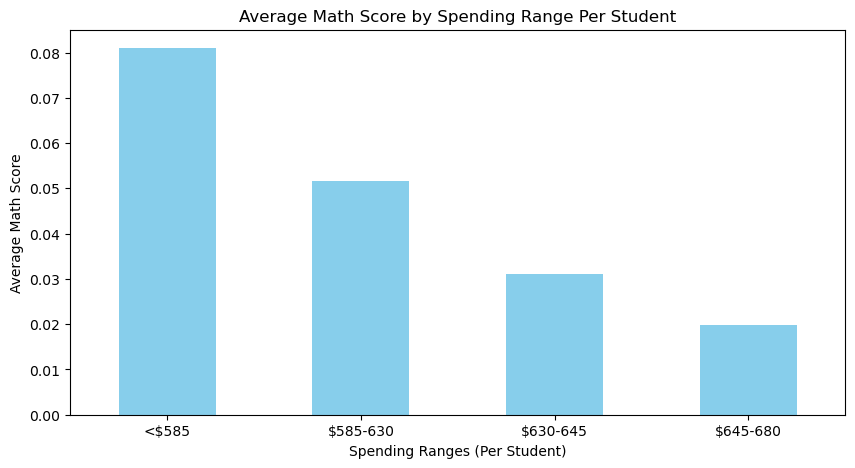

In [58]:
# Clean and convert 'Per Student Budget' to a numeric type for accurate operations
per_school_summary['Per Student Budget'] = per_school_summary['Per Student Budget'].replace('[\$,]', '', regex=True).astype(float)

# Define bins and labels for school spending
spending_bins = [0, 585, 630, 645, 680]
labels = ["<$585", "$585-630", "$630-645", "$645-680"]

# Categorize spending based on the bins
per_school_summary['Spending Ranges (Per Student)'] = pd.cut(per_school_summary['Per Student Budget'], bins=spending_bins, labels=labels)

# Group by the newly created spending ranges, setting observed=True to avoid FutureWarning
grouped_spending = per_school_summary.groupby('Spending Ranges (Per Student)', observed=True)

# Calculate averages and percentages for desired columns
average_math_score = grouped_spending['Average Math Score'].mean()
average_reading_score = grouped_spending['Average Reading Score'].mean()
percent_passing_math = grouped_spending['Percent Passing Math'].mean()
percent_passing_reading = grouped_spending['Percent Passing Reading'].mean()
percent_overall_passing = grouped_spending['Overall Passing Rate'].mean()

# Assemble into DataFrame
spending_summary = pd.DataFrame({
    "Average Math Score": average_math_score,
    "Average Reading Score": average_reading_score,
    "Percent Passing Math": percent_passing_math,
    "Percent Passing Reading": percent_passing_reading,
    "Overall Passing Rate": percent_overall_passing
})

# Display the summary DataFrame
print(spending_summary)

# Plotting average math scores by spending range
spending_summary['Average Math Score'].plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Average Math Score by Spending Range Per Student')
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.show()



In [61]:
# Use `pd.cut` to categorize spending based on the bins.
school_spending_df["Spending Ranges (Per Student)"] = pd.cut(school_spending_df['Per Student Budget'], bins=spending_bins, labels=labels)
school_spending_df


,School Type,Total Students,Total School Budget,Per Student Budget,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Passing Rate,Spending Ranges (Per Student)
school_name,,,,,,,,,,
Bailey High School,District,4976,"$3,124,928.00",628.0,0.015484,0.016285,66.680064,81.933280,54.642283,$585-630
Cabrera High School,Charter,1858,"$1,081,356.00",582.0,0.044705,0.045197,94.133477,97.039828,91.334769,<$585
Figueroa High School,District,2949,"$1,884,411.00",639.0,0.026013,0.027521,65.988471,80.739234,53.204476,$630-645
Ford High School,District,2739,"$1,763,916.00",644.0,0.028150,0.029480,68.309602,79.299014,54.289887,$630-645
Griffin High School,Charter,1468,"$917,500.00",625.0,0.056779,0.057096,93.392371,97.138965,90.599455,$585-630
Hernandez High School,District,4635,"$3,022,020.00",652.0,0.016675,0.017462,66.752967,80.862999,53.527508,$645-680
Holden High School,Charter,427,"$248,087.00",581.0,0.196261,0.196288,92.505855,96.252927,89.227166,<$585
Huang High School,District,2917,"$1,910,635.00",655.0,0.026270,0.027831,65.683922,81.316421,53.513884,$645-680
Johnson High School,District,4761,"$3,094,650.00",650.0,0.016188,0.017006,66.057551,81.222432,53.539172,$645-680


In [74]:
# Calculate averages for the desired columns. 
spending_math_scores = per_school_summary.groupby("Spending Ranges (Per Student)", observed=True)["Average Math Score"].mean()
spending_reading_scores = per_school_summary.groupby("Spending Ranges (Per Student)", observed=True)["Average Reading Score"].mean()
spending_passing_math = per_school_summary.groupby("Spending Ranges (Per Student)", observed=True)["Percent Passing Math"].mean()
spending_passing_reading = per_school_summary.groupby("Spending Ranges (Per Student)", observed=True)["Percent Passing Reading"].mean()
overall_passing_spending = per_school_summary.groupby("Spending Ranges (Per Student)", observed=True)["Overall Passing Rate"].mean()

# Assemble the averages into a DataFrame
spending_summary_df = pd.DataFrame({
    "Average Math Score": spending_math_scores,
    "Average Reading Score": spending_reading_scores,
    "Percent Passing Math": spending_passing_math,
    "Percent Passing Reading": spending_passing_reading,
    "Overall Passing Rate": overall_passing_spending
})

# Display the summary DataFrame
print(spending_summary_df)


                               Average Math Score  Average Reading Score  \
Spending Ranges (Per Student)                                              
<$585                                    0.080983               0.081229   
$585-630                                 0.051688               0.052072   
$630-645                                 0.031100               0.032119   
$645-680                                 0.019711               0.020766   

                               Percent Passing Math  Percent Passing Reading  \
Spending Ranges (Per Student)                                                  
<$585                                     93.460096                96.610877   
$585-630                                  87.133538                92.718205   
$630-645                                  73.484209                84.391793   
$645-680                                  66.164813                81.133951   

                               Overall Passing Rate  
Spending

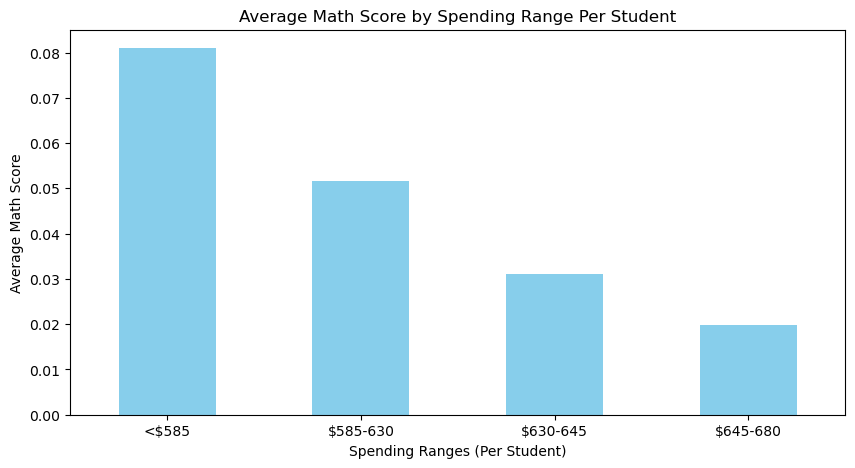

,Average Math Score,Average Reading Score,Percent Passing Math,Percent Passing Reading,Overall Passing Rate
Spending Ranges (Per Student),,,,,
<$585,0.080983,0.081229,93.460096,96.610877,90.369459
$585-630,0.051688,0.052072,87.133538,92.718205,81.418596
$630-645,0.031100,0.032119,73.484209,84.391793,62.857656
$645-680,0.019711,0.020766,66.164813,81.133951,53.526855


In [77]:
# Assemble into DataFrame
spending_summary_df['Average Math Score'].plot(kind='bar', color='skyblue', figsize=(10, 5))
plt.title('Average Math Score by Spending Range Per Student')
plt.xlabel('Spending Ranges (Per Student)')
plt.ylabel('Average Math Score')
plt.xticks(rotation=0)
plt.show()
# Display results
spending_summary


## Scores by School Size

In [83]:
# Establish the bins.
size_bins = [0, 1000, 2000, 5000]
labels = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]


In [82]:
# Categorize the spending based on the bins
# Use `pd.cut` on the "Total Students" column of the `per_school_summary` DataFrame.

per_school_summary["School Size"] = pd.cut(per_school_summary['Total Students'], bins=size_bins, labels=labels)
# Display the updated DataFrame to confirm the new 'School Size' category
print(per_school_summary[['Total Students', 'School Size']])

                       Total Students         School Size
school_name                                              
Bailey High School               4976   Large (2000-5000)
Cabrera High School              1858  Medium (1000-2000)
Figueroa High School             2949   Large (2000-5000)
Ford High School                 2739   Large (2000-5000)
Griffin High School              1468  Medium (1000-2000)
Hernandez High School            4635   Large (2000-5000)
Holden High School                427       Small (<1000)
Huang High School                2917   Large (2000-5000)
Johnson High School              4761   Large (2000-5000)
Pena High School                  962       Small (<1000)
Rodriguez High School            3999   Large (2000-5000)
Shelton High School              1761  Medium (1000-2000)
Thomas High School               1635  Medium (1000-2000)
Wilson High School               2283   Large (2000-5000)
Wright High School               1800  Medium (1000-2000)


In [31]:
# Calculate averages for the desired columns.
size_math_scores = per_school_summary.groupby(["School Size"])["Average Math Score"].mean()
size_reading_scores = per_school_summary.groupby(["School Size"])["Average Reading Score"].mean()
size_passing_math = per_school_summary.groupby(["School Size"])["Percent Passing Math"].mean()
size_passing_reading = per_school_summary.groupby(["School Size"])["Percent Passing Reading"].mean()
size_overall_passing = per_school_summary.groupby(["School Size"])["Overall Passing Rate"].mean()


In [91]:
import pandas as pd

size_math_scores = per_school_summary.groupby("School Size", observed=True)["Average Math Score"].mean()
size_reading_scores = per_school_summary.groupby("School Size", observed=True)["Average Reading Score"].mean()
size_passing_math = per_school_summary.groupby("School Size", observed=True)["Percent Passing Math"].mean()
size_passing_reading = per_school_summary.groupby("School Size", observed=True)["Percent Passing Reading"].mean()
size_overall_passing = per_school_summary.groupby("School Size", observed=True)["Overall Passing Rate"].mean()

# Assemble the calculated metrics into a DataFrame
size_summary_df = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "Percent Passing Math": size_passing_math,
    "Percent Passing Reading": size_passing_reading,
    "Overall Passing Rate": size_overall_passing
})

# Display the summary DataFrame
print(size_summary_df)

                    Average Math Score  Average Reading Score  \
School Size                                                     
Small (<1000)                 0.141706               0.141826   
Medium (1000-2000)            0.049266               0.049553   
Large (2000-5000)             0.023059               0.024071   

                    Percent Passing Math  Percent Passing Reading  \
School Size                                                         
Small (<1000)                  93.550225                96.099437   
Medium (1000-2000)             93.599695                96.790680   
Large (2000-5000)              69.963361                82.766634   

                    Overall Passing Rate  
School Size                               
Small (<1000)                  89.883853  
Medium (1000-2000)             90.621535  
Large (2000-5000)              58.286003  


In [93]:
# Create a DataFrame called `size_summary` that breaks down school performance based on school size (small, medium, or large).
# Use the scores above to create a new DataFrame called `size_summary`
size_summary = pd.DataFrame({
    "Average Math Score": size_math_scores,
    "Average Reading Score": size_reading_scores,
    "Percent Passing Math": size_passing_math,
    "Percent Passing Reading": size_passing_reading,
    "Overall Passing Rate": size_overall_passing
})

# Display the DataFrame to check it
print(size_summary)



                    Average Math Score  Average Reading Score  \
School Size                                                     
Small (<1000)                 0.141706               0.141826   
Medium (1000-2000)            0.049266               0.049553   
Large (2000-5000)             0.023059               0.024071   

                    Percent Passing Math  Percent Passing Reading  \
School Size                                                         
Small (<1000)                  93.550225                96.099437   
Medium (1000-2000)             93.599695                96.790680   
Large (2000-5000)              69.963361                82.766634   

                    Overall Passing Rate  
School Size                               
Small (<1000)                  89.883853  
Medium (1000-2000)             90.621535  
Large (2000-5000)              58.286003  


## Scores by School Type

In [96]:
# Group the per_school_summary DataFrame by "School Type" and average the results.
average_math_score_by_type = per_school_summary.groupby(["School Type"])["Average Math Score"].mean()
average_reading_score_by_type = per_school_summary.groupby(["School Type"])["Average Reading Score"].mean()
average_percent_passing_math_by_type = per_school_summary.groupby(["School Type"])["Percent Passing Math"].mean()
average_percent_passing_reading_by_type = per_school_summary.groupby(["School Type"])["Percent Passing Reading"].mean()
average_percent_overall_passing_by_type = per_school_summary.groupby(["School Type"])["Overall Passing Rate"].mean()


type_summary_df = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "Percent Passing Math": average_percent_passing_math_by_type,
    "Percent Passing Reading": average_percent_passing_reading_by_type,
    "Overall Passing Rate": average_percent_overall_passing_by_type
})
# Display the summary DataFrame
print(type_summary_df)

             Average Math Score  Average Reading Score  Percent Passing Math  \
School Type                                                                    
Charter                0.070777               0.071026             93.620830   
District               0.021142               0.022254             66.548453   

             Percent Passing Reading  Overall Passing Rate  
School Type                                                 
Charter                    96.586489             90.432244  
District                   80.799062             53.672208  


In [102]:
# Assemble the new data by type into a DataFrame called `type_summary`

type_summary = pd.DataFrame({
    "Average Math Score": average_math_score_by_type,
    "Average Reading Score": average_reading_score_by_type,
    "Percent Passing Math": average_percent_passing_math_by_type,
    "Percent Passing Reading": average_percent_passing_reading_by_type,
    "Overall Passing Rate": average_percent_overall_passing_by_type
})

# Display the new DataFrame
print(type_summary)


             Average Math Score  Average Reading Score  Percent Passing Math  \
School Type                                                                    
Charter                0.070777               0.071026             93.620830   
District               0.021142               0.022254             66.548453   

             Percent Passing Reading  Overall Passing Rate  
School Type                                                 
Charter                    96.586489             90.432244  
District                   80.799062             53.672208  
